In [129]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, f1_score, balanced_accuracy_score
import joblib
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report


In [130]:
dataset= pd.read_csv('Lung_Cancer_Dataset.csv')
dataset.head()

,PATIENT_ID,GENOMIC SEX,AGE,Education_Level,DOB,PLACE_OF_BIRTH,GENDER,Sexual_Partners_Life_Time,Pet_Owner,NUMBER_OF_CHILDREN,...,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMPTION,WEEKLY_GLASSES_OF_ALCOHOL,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,A10230,M,69.0,1,26/10/1955,Sukhumi,1,5,1,3,...,2.0,1,2.0,2,9,2,2,2,2,1
1,A10231,M,74.0,2,07/12/1950,Kabul,1,1,1,0,...,2.0,2,1.0,1,NaN,1,2,2,2,1
2,A10232,F,59.0,3,02/01/1965,Episkopi Cantonment,0,0,1,5,...,2.0,1,2.0,1,NaN,2,2,1,2,2
3,A10233,M,63.0,4,21/10/1961,Tirana,1,3,1,3,...,1.0,1,1.0,2,14,1,1,2,2,2
4,A10234,F,63.0,1,12/11/1961,Algiers,0,4,1,3,...,1.0,1,2.0,1,NaN,2,2,1,1,2


C:\Users\Hashir\AppData\Local\Temp\ipykernel_1416\2694440192.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Cancer', 'Cancer','NaN'])


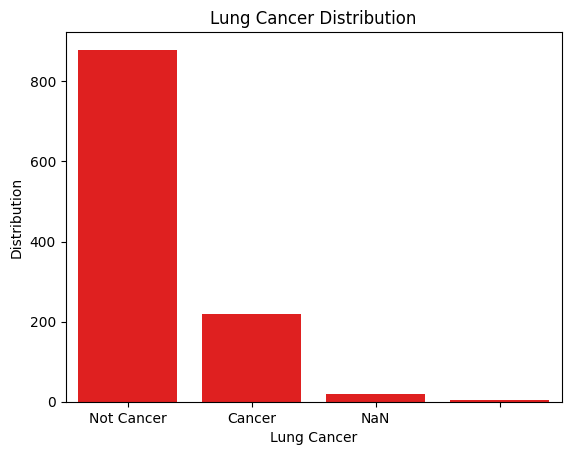

In [131]:
ax = sns.countplot(x='LUNG_CANCER', data=dataset, color='red')
ax.set_xticklabels(['Not Cancer', 'Cancer','NaN'])
plt.xlabel('Lung Cancer')
plt.ylabel('Distribution')
plt.title('Lung Cancer Distribution')
plt.show()

Data Preparation: Cleaning and Transforming data 

In [132]:
missing_values = dataset.isnull().sum()
print(missing_values)

PATIENT_ID                     0
GENOMIC SEX                    0
AGE                           13
Education_Level                0
DOB                            0
PLACE_OF_BIRTH                 0
GENDER                         0
Sexual_Partners_Life_Time      0
Pet_Owner                      0
NUMBER_OF_CHILDREN             0
Pet_Type                      19
SMOKING_STATUS                 0
TOBACCO_TYPE                 745
YELLOW_SKIN                    0
ANXIETY                        0
PEER_PRESSURE                  0
COPD_DIAGNOSES                18
FATIGUE                        5
ALLERGY                        0
WHEEZING                      10
ALCOHOL_CONSUMPTION            0
WEEKLY_GLASSES_OF_ALCOHOL    501
COUGHING                       0
SHORTNESS_OF_BREATH            4
SWALLOWING_DIFFICULTY          0
CHEST_PAIN                     0
LUNG_CANCER                    0
dtype: int64


In [133]:
dataset.drop(columns=['TOBACCO_TYPE'], inplace=True)
dataset.drop(columns=['PLACE_OF_BIRTH'], inplace=True)
dataset.drop(columns=['PATIENT_ID'], inplace=True)
dataset.drop(columns=['DOB'], inplace=True)
dataset.drop(columns=['GENOMIC SEX'], inplace=True)

In [134]:
dataset['AGE'].fillna(dataset['AGE'].median(), inplace=True)

C:\Users\Hashir\AppData\Local\Temp\ipykernel_1416\762046471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['AGE'].fillna(dataset['AGE'].median(), inplace=True)


In [135]:
dataset['WEEKLY_GLASSES_OF_ALCOHOL'].unique()

array(['9', nan, '14', '4', '5', '12', '10', '7', '11', '15', '3', '6',
       '1', '8', '2', '13', 'SIX', '60000', 'one', '-1'], dtype=object)

In [136]:
dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = dataset['WEEKLY_GLASSES_OF_ALCOHOL'].replace('SIX', 6)
dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = dataset['WEEKLY_GLASSES_OF_ALCOHOL'].replace('60000', 1)
dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = dataset['WEEKLY_GLASSES_OF_ALCOHOL'].replace('one', 1)
dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = dataset['WEEKLY_GLASSES_OF_ALCOHOL'].replace(-1, 1)
dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = pd.to_numeric(dataset['WEEKLY_GLASSES_OF_ALCOHOL'], errors='coerce')

dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = dataset['WEEKLY_GLASSES_OF_ALCOHOL'].fillna(0)

dataset['WEEKLY_GLASSES_OF_ALCOHOL'] = dataset['WEEKLY_GLASSES_OF_ALCOHOL'].astype(int)
print (dataset['WEEKLY_GLASSES_OF_ALCOHOL'].unique())

[ 9  0 14  4  5 12 10  7 11 15  3  6  1  8  2 13 -1]


In [137]:
print (dataset['WHEEZING'].unique())

[ 2.  1.  3. nan]


In [138]:
dataset['WHEEZING'] = dataset['WHEEZING'].replace(3, 1)
dataset['WHEEZING'] = dataset['WHEEZING'].fillna(1)
dataset['WHEEZING'] = dataset['WHEEZING'].astype(int)
print(dataset['WHEEZING'].unique())

[2 1]


In [139]:
dataset.isnull().sum()

AGE                           0
Education_Level               0
GENDER                        0
Sexual_Partners_Life_Time     0
Pet_Owner                     0
NUMBER_OF_CHILDREN            0
Pet_Type                     19
SMOKING_STATUS                0
YELLOW_SKIN                   0
ANXIETY                       0
PEER_PRESSURE                 0
COPD_DIAGNOSES               18
FATIGUE                       5
ALLERGY                       0
WHEEZING                      0
ALCOHOL_CONSUMPTION           0
WEEKLY_GLASSES_OF_ALCOHOL     0
COUGHING                      0
SHORTNESS_OF_BREATH           4
SWALLOWING_DIFFICULTY         0
CHEST_PAIN                    0
LUNG_CANCER                   0
dtype: int64

In [140]:
dataset['SHORTNESS_OF_BREATH'].unique()

array(['2', '1', 'Two', nan, '-1'], dtype=object)

In [141]:
dataset['SHORTNESS_OF_BREATH'] = dataset['SHORTNESS_OF_BREATH'].replace('Two', 2)
dataset['SHORTNESS_OF_BREATH'] = dataset['SHORTNESS_OF_BREATH'].replace('-1', 1)
dataset['SHORTNESS_OF_BREATH'] = pd.to_numeric(dataset['SHORTNESS_OF_BREATH'], errors='coerce')
mean_value = dataset['SHORTNESS_OF_BREATH'].mean()
mean_ceil = math.ceil(mean_value)
dataset['SHORTNESS_OF_BREATH'] = dataset['SHORTNESS_OF_BREATH'].fillna(mean_ceil)
dataset['SHORTNESS_OF_BREATH'] = dataset['SHORTNESS_OF_BREATH'].astype(int)
dataset['SHORTNESS_OF_BREATH'].unique()

array([2, 1])

In [ ]:
dataset['FATIGUE '].unique()

array([ 2.,  1., nan])

In [143]:
dataset = dataset.rename(columns={'FATIGUE ': 'FATIGUE'})
dataset['FATIGUE'] = dataset['FATIGUE'].fillna(1)
dataset['FATIGUE'] = dataset['FATIGUE'].astype(int)
dataset['FATIGUE'].unique()

array([2, 1])

In [144]:
dataset['COPD_DIAGNOSES'].unique()

array([ 1.,  2., nan])

In [145]:
dataset['COPD_DIAGNOSES'] = dataset['COPD_DIAGNOSES'].fillna(1)
dataset['COPD_DIAGNOSES'] = dataset['COPD_DIAGNOSES'].astype(int)
dataset['COPD_DIAGNOSES'].unique()

array([1, 2])

In [146]:
dataset['LUNG_CANCER'].unique()

array(['1', '2', 'No', 'Yes'], dtype=object)

In [147]:
dataset['LUNG_CANCER'] = dataset['LUNG_CANCER'].replace('No', 1)
dataset['LUNG_CANCER'] = dataset['LUNG_CANCER'].replace('Yes', 2)
dataset['LUNG_CANCER'] = dataset['LUNG_CANCER'].astype(int)
dataset['LUNG_CANCER'].unique()

array([1, 2])

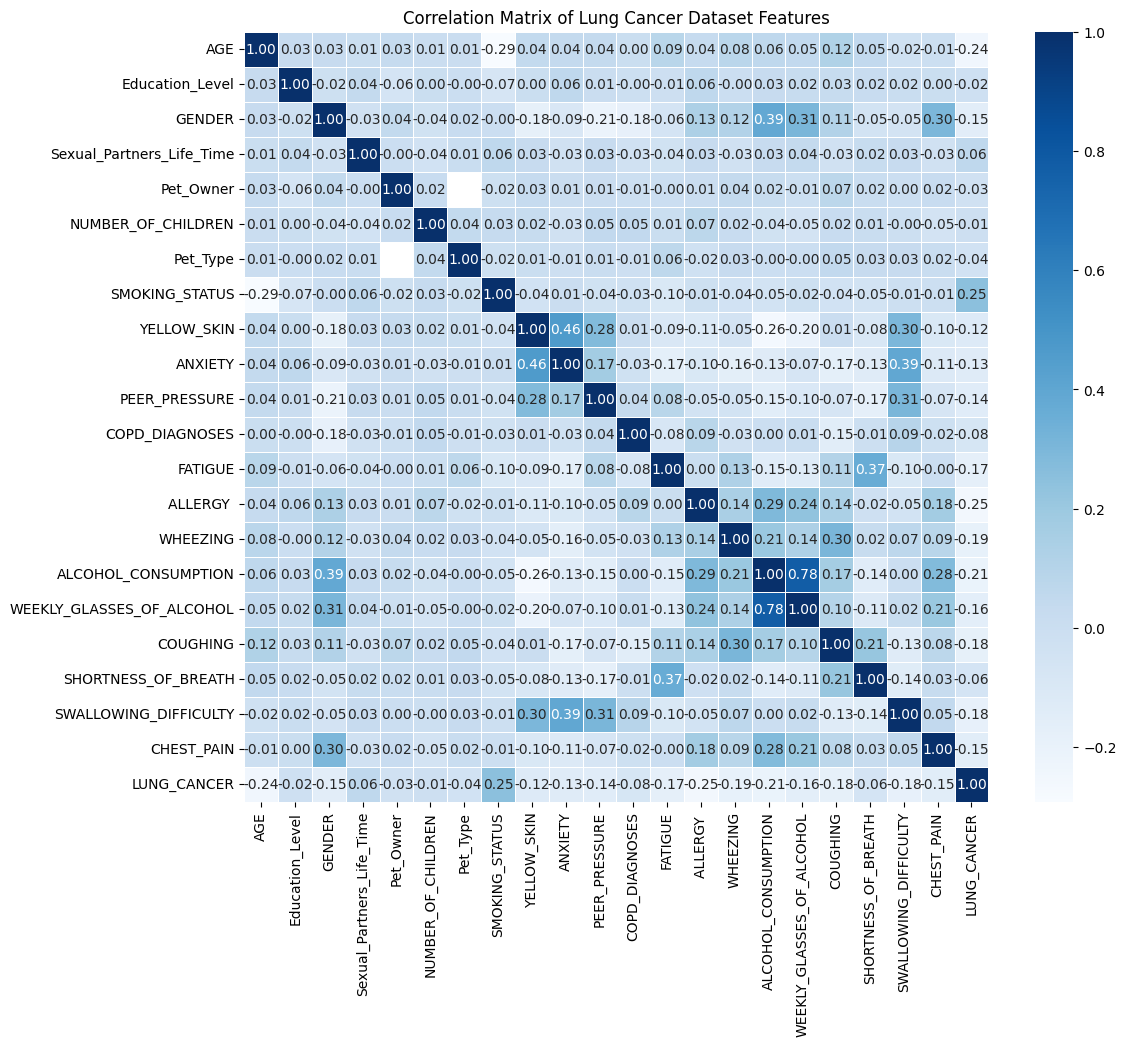

Dropped features: ['Education_Level', 'Sexual_Partners_Life_Time', 'Pet_Owner', 'NUMBER_OF_CHILDREN', 'Pet_Type', 'COPD_DIAGNOSES', 'SHORTNESS_OF_BREATH']


In [148]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Lung Cancer Dataset Features")
plt.show()

corr_matrix = dataset.corr()
target_corr = corr_matrix['LUNG_CANCER'].drop('LUNG_CANCER')  
selected_features = target_corr[abs(target_corr) >= 0.1].index.tolist()

dropped_features = target_corr[abs(target_corr) < 0.1].index.tolist()
print("Dropped features:", dropped_features)

df_reduced = dataset[selected_features + ['LUNG_CANCER']]

– Modelling: Creating Predictive Classification Models

In [149]:
df_reduced.isna().sum()

AGE                          0
GENDER                       0
SMOKING_STATUS               0
YELLOW_SKIN                  0
ANXIETY                      0
PEER_PRESSURE                0
FATIGUE                      0
ALLERGY                      0
WHEEZING                     0
ALCOHOL_CONSUMPTION          0
WEEKLY_GLASSES_OF_ALCOHOL    0
COUGHING                     0
SWALLOWING_DIFFICULTY        0
CHEST_PAIN                   0
LUNG_CANCER                  0
dtype: int64

In [150]:
features = df_reduced.drop(columns=['LUNG_CANCER'])
target= df_reduced['LUNG_CANCER']
x_train, x_test, y_train, y_test = train_test_split (features, target, test_size=0.3, random_state=42)

In [159]:
features.head()

,AGE,GENDER,SMOKING_STATUS,YELLOW_SKIN,ANXIETY,PEER_PRESSURE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMPTION,WEEKLY_GLASSES_OF_ALCOHOL,COUGHING,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,69.0,1,1,2,2,1,2,1,2,2,9,2,2,2
1,74.0,1,2,1,1,1,2,2,1,1,0,1,2,2
2,59.0,0,1,1,1,2,2,1,2,1,0,2,1,2
3,63.0,1,2,2,2,1,1,1,1,2,14,1,2,2
4,63.0,0,1,2,1,1,1,1,2,1,0,2,1,1


In [151]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [152]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(x_train, y_train)


In [153]:
print(X_res.shape, y_res.shape)

(1246, 14) (1246,)


In [ ]:
knn_pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5)
knn_grid.fit(X_res, y_res)

print("\nKNN Best Params:", knn_grid.best_params_)
print("KNN Test Accuracy:", knn_grid.score(x_test, y_test))
print("KNN CV Mean Score:", knn_grid.best_score_)

# ---------------- Decision Tree ----------------
dt_pipeline = Pipeline([
    ('scaled_array', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])
dt_params = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [3, 5, 10, None],
    'dt__min_samples_split': [2, 5, 10]
}
dt_grid = GridSearchCV(dt_pipeline, dt_params, cv=5)
dt_grid.fit(X_res, y_res)

print("\nDecision Tree Best Params:", dt_grid.best_params_)
print("Decision Tree Test Accuracy:", dt_grid.score(x_test, y_test))
print("Decision Tree CV Mean Score:", dt_grid.best_score_)

param_grid = {
    'n_estimators': [100, 200, 300],              
    'max_depth': [None, 10, 20, 30],              
    'min_samples_split': [2, 5, 10],              
    'min_samples_leaf': [1, 2, 4]                 
}
RandForest = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42), 
    param_grid=param_grid,
    scoring='accuracy',                             
    cv=5,                                           
    n_jobs=-1,                                      
    verbose=2                                       
)
RandForest.fit(X_res, y_res)

print("\nRandom Forest Best Params:", RandForest.best_params_)
print("Random Forest Test Accuracy:", RandForest.score(x_test, y_test))
print("Random Forest CV Mean Score:", RandForest.best_score_)


KNN Best Params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
KNN Test Accuracy: 0.8928571428571429
KNN CV Mean Score: 0.943029718875502

Decision Tree Best Params: {'dt__criterion': 'gini', 'dt__max_depth': 10, 'dt__min_samples_split': 2}
Decision Tree Test Accuracy: 0.9047619047619048
Decision Tree CV Mean Score: 0.8925140562248997
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Random Forest Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Test Accuracy: 0.9166666666666666
Random Forest CV Mean Score: 0.9326297188755021


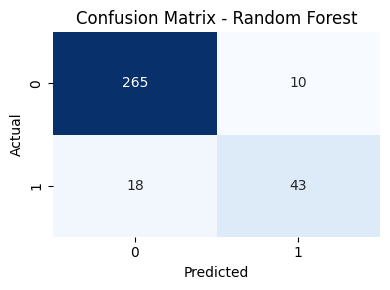

Classification Report - Random Forest
              precision    recall  f1-score   support

           1       0.94      0.96      0.95       275
           2       0.81      0.70      0.75        61

    accuracy                           0.92       336
   macro avg       0.87      0.83      0.85       336
weighted avg       0.91      0.92      0.91       336



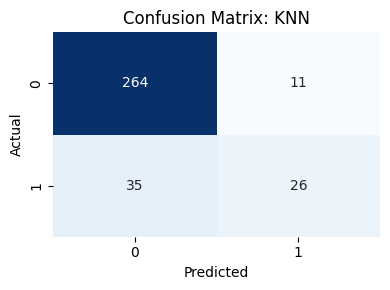

Classification Report: KNN
              precision    recall  f1-score   support

           1       0.88      0.96      0.92       275
           2       0.70      0.43      0.53        61

    accuracy                           0.86       336
   macro avg       0.79      0.69      0.73       336
weighted avg       0.85      0.86      0.85       336



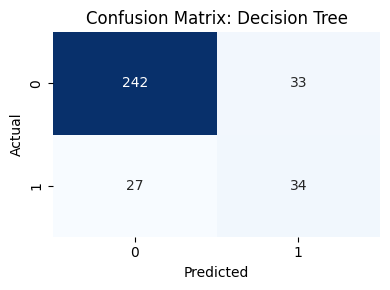

Classification Report: Decision Tree
              precision    recall  f1-score   support

           1       0.90      0.88      0.89       275
           2       0.51      0.56      0.53        61

    accuracy                           0.82       336
   macro avg       0.70      0.72      0.71       336
weighted avg       0.83      0.82      0.82       336



In [155]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

y_pred_knn = cross_val_predict(knn_pipeline, x_test, y_test, cv=3)
y_pred_dt = cross_val_predict(dt_pipeline, x_test, y_test, cv=3)
rt = RandForest.predict(x_test)

plot_confusion_matrix(y_test, rt, 'Confusion Matrix - Random Forest')
print("Classification Report - Random Forest")
print(classification_report(y_test, rt))

plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix: KNN")
print("Classification Report: KNN")
print(classification_report(y_test, y_pred_knn))
 
plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix: Decision Tree")
print("Classification Report: Decision Tree")
print(classification_report(y_test, y_pred_dt))

In [157]:
joblib.dump(knn_grid, 'Deployment/knn_model.pkl')
joblib.dump(dt_grid, 'Deployment/dt_model.pkl')
joblib.dump(RandForest, 'Deployment/rf_model.pkl')
joblib.dump(scaler, 'Deployment/scaler.pkl')

['Deployment/scaler.pkl']